In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
import numpy as np
import json
import requests
import pandas as pd

QUERY_URL_BASIC = 'http://localhost:8982/solr/reviews/select?fl=score%20*&fq=rating_score%3A%20%5B8.0%20TO%2010.0%5D&indent=true&q.op=OR&q=genre%3Ajazz%5E2%0Areview_content%3Acalm%0Areview_content%3Aquiet%0Areview_content%3Aambient%0Areview_content%3Arelaxing%0Areview_content%3A%22classical%20music%22%5E2%0A!review_content%3A%22violent%22&rows=25'
QUERY_URL_ADVANCED = 'http://localhost:8983/solr/reviews/select?fl=score%20*&fq=rating_score%3A%20%5B8.0%20TO%2010.0%5D&indent=true&q.op=OR&q=genre%3Ajazz%5E2%0Areview_content%3Acalm%0Areview_content%3Aquiet%0Areview_content%3Aambient%0Areview_content%3Arelaxing%0Areview_content%3A%22classical%20music%22%5E2%0A!review_content%3A%22violent%22&rows=25'

QRELS_FILE_BASIC = f'qrels1_basic.txt'
QRELS_FILE_ADVANCED = f'qrels1_advanced.txt'

In [132]:
relevant_basic = list(map(lambda el: [int(el.strip())], open(QRELS_FILE_BASIC).readlines()))
results_basic = requests.get(QUERY_URL_BASIC).json()['response']['docs']

relevant_advanced = list(map(lambda el: el.strip(), open(QRELS_FILE_ADVANCED).readlines()))
results_advanced = requests.get(QUERY_URL_ADVANCED).json()['response']['docs']

# results_advanced[0]['reviewid']

In [133]:
metrics = {}
metric = lambda f: metrics.setdefault(f.__name__, f)
print(metric)

<function <lambda> at 0x150146ca0>


In [134]:
@metric
def ap(results, relevant):
    """Average Precision"""
    for doc in results:
        print(doc['reviewid'])
    precision_values = [
        len([
            doc 
            for doc in results[:idx]
            if doc['reviewid'] in relevant
        ]) / idx 
        for idx in range(1, len(results))
    ]
    print(precision_values)
    return sum(precision_values)/len(precision_values)

@metric
def p5(results, relevant, n=5):
    """Precision at N"""
    return len([doc for doc in results[:n] if doc['reviewid'] in relevant])/n

@metric
def p10(results, relevant, n=10):
    """Precision at N"""
    return len([doc for doc in results[:n] if doc['reviewid'] in relevant])/n

@metric
def p15(results, relevant, n=15):
    """Precision at N"""
    return len([doc for doc in results[:n] if doc['reviewid'] in relevant])/n

@metric
def p20(results, relevant, n=20):
    """Precision at N"""
    return len([doc for doc in results[:n] if doc['reviewid'] in relevant])/n

@metric
def p25(results, relevant, n=25):
    """Precision at N"""
    return len([doc for doc in results[:n] if doc['reviewid'] in relevant])/n

def calculate_metric(key, results, relevant):
    return metrics[key](results, relevant)

# Define metrics to be calculated
evaluation_metrics = {
    'ap': 'Average Precision',
    'p5': 'Precision at 05 (P@05)',
    'p10': 'Precision at 10 (P@10)',
    'p15': 'Precision at 15 (P@15)',
    'p20': 'Precision at 20 (P@20)',
    'p25': 'Precision at 25 (P@25)'
}

In [135]:
# Calculate all metrics and export results as LaTeX table
df_basic = pd.DataFrame([['Metric','Value']] +
    [
        [evaluation_metrics[m], calculate_metric(m, results_basic, relevant_basic)]
        for m in evaluation_metrics
    ]
)

with open(f'results_basic_2.tex','w') as tf:
    tf.write(df_basic.to_latex())



[12448]
[13088]
[22299]
[13247]
[21518]
[4785]
[7119]
[22664]
[8483]
[16756]
[2197]
[10022]
[7438]
[20090]
[5368]
[10]
[21158]
[6280]
[20811]
[22347]
[10901]
[19736]
[1112]
[13064]
[5251]
[0.0, 0.5, 0.6666666666666666, 0.75, 0.6, 0.6666666666666666, 0.5714285714285714, 0.625, 0.6666666666666666, 0.6, 0.5454545454545454, 0.5, 0.5384615384615384, 0.5, 0.4666666666666667, 0.4375, 0.4117647058823529, 0.3888888888888889, 0.3684210526315789, 0.35, 0.3333333333333333, 0.3181818181818182, 0.30434782608695654, 0.2916666666666667]


/var/folders/89/16jzh22s51vd7yf1qx64cgdh0000gn/T/ipykernel_92554/1384990862.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df_basic.to_latex())


In [136]:
df_advanced = pd.DataFrame([['Metric','Value']] +
    [
        [evaluation_metrics[m], calculate_metric(m, results_advanced, relevant_advanced)]
        for m in evaluation_metrics
    ]
)

with open(f'results_advanced.tex','w') as tf:
    tf.write(df_advanced.to_latex())

12448
13088
22299
4785
13247
21518
7119
22664
8483
16756
13379
2197
7438
10022
6280
10
7445
20090
21158
20557
20811
22347
10901
20505
2434
[0.0, 0.5, 0.6666666666666666, 0.75, 0.8, 0.6666666666666666, 0.5714285714285714, 0.625, 0.6666666666666666, 0.6, 0.6363636363636364, 0.5833333333333334, 0.6153846153846154, 0.5714285714285714, 0.5333333333333333, 0.5, 0.47058823529411764, 0.4444444444444444, 0.42105263157894735, 0.45, 0.42857142857142855, 0.4090909090909091, 0.391304347826087, 0.4166666666666667]


/var/folders/89/16jzh22s51vd7yf1qx64cgdh0000gn/T/ipykernel_92554/1180343754.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df_advanced.to_latex())


In [137]:
# PRECISION-RECALL CURVE
# Calculate precision and recall values as we move down the ranked list
precision_values_basic = [
    len([
        doc 
        for doc in results_basic[:idx]
        if doc['reviewid'] in relevant_basic
    ]) / idx 
    for idx, _ in enumerate(results_basic, start=1)
]

recall_values_basic = [
    len([
        doc for doc in results_basic[:idx]
        if doc['reviewid'] in relevant_basic
    ]) / len(relevant_basic)
    for idx, _ in enumerate(results_basic, start=1)
]



In [138]:
precision_values_advanced = [
    len([
        doc 
        for doc in results_advanced[:idx]
        if doc['reviewid'] in relevant_advanced
    ]) / idx 
    for idx, _ in enumerate(results_advanced, start=1)
]

recall_values_advanced = [
    len([
        doc for doc in results_advanced[:idx]
        if doc['reviewid'] in relevant_advanced
    ]) / len(relevant_advanced)
    for idx, _ in enumerate(results_advanced, start=1)
]

In [139]:
precision_recall_match_basic = {k: v for k,v in zip(recall_values_basic, precision_values_basic)}
precision_recall_match_advanced = {k: v for k,v in zip(recall_values_advanced, precision_values_advanced)}

# Extend recall_values to include traditional steps for a better curve (0.1, 0.2 ...)
recall_values_basic.extend([step for step in np.arange(0.1, 1.1, 0.01) if step not in recall_values_basic])
recall_values_basic = sorted(set(recall_values_basic))

recall_values_advanced.extend([step for step in np.arange(0.1, 1.1, 0.01) if step not in recall_values_advanced])
recall_values_advanced = sorted(set(recall_values_advanced))

recall_values_basic

[0.0,
 0.1,
 0.11,
 0.12,
 0.13,
 0.13999999999999999,
 0.14285714285714285,
 0.14999999999999997,
 0.15999999999999998,
 0.16999999999999998,
 0.17999999999999997,
 0.18999999999999995,
 0.19999999999999996,
 0.20999999999999996,
 0.21999999999999995,
 0.22999999999999995,
 0.23999999999999994,
 0.24999999999999992,
 0.2599999999999999,
 0.2699999999999999,
 0.2799999999999999,
 0.2857142857142857,
 0.2899999999999999,
 0.29999999999999993,
 0.30999999999999994,
 0.3199999999999999,
 0.32999999999999985,
 0.33999999999999986,
 0.34999999999999987,
 0.3599999999999999,
 0.3699999999999999,
 0.3799999999999999,
 0.3899999999999999,
 0.3999999999999998,
 0.4099999999999998,
 0.4199999999999998,
 0.42857142857142855,
 0.4299999999999998,
 0.43999999999999984,
 0.44999999999999984,
 0.45999999999999985,
 0.46999999999999986,
 0.47999999999999976,
 0.48999999999999977,
 0.4999999999999998,
 0.5099999999999998,
 0.5199999999999998,
 0.5299999999999998,
 0.5399999999999998,
 0.549999999999999

In [140]:
for idx, step in enumerate(recall_values_basic):
    if step not in precision_recall_match_basic:
        if recall_values_basic[idx-1] in precision_recall_match_basic:
            precision_recall_match_basic[step] = precision_recall_match_basic[recall_values_basic[idx-1]]
        else:
            precision_recall_match_basic[step] = precision_recall_match_basic[recall_values_basic[idx+1]]

for idx, step in enumerate(recall_values_advanced):
    if step not in precision_recall_match_advanced:
        if recall_values_advanced[idx-1] in precision_recall_match_advanced:
            precision_recall_match_advanced[step] = precision_recall_match_advanced[recall_values_advanced[idx-1]]
        else:
            precision_recall_match_advanced[step] = precision_recall_match_advanced[recall_values_advanced[idx+1]]



In [141]:
disp_basic = PrecisionRecallDisplay([precision_recall_match_basic.get(r) for r in recall_values_basic], recall_values_basic)
disp_advanced = PrecisionRecallDisplay([precision_recall_match_advanced.get(r) for r in recall_values_advanced], recall_values_advanced)

In [142]:
recall_values_basic

[0.0,
 0.1,
 0.11,
 0.12,
 0.13,
 0.13999999999999999,
 0.14285714285714285,
 0.14999999999999997,
 0.15999999999999998,
 0.16999999999999998,
 0.17999999999999997,
 0.18999999999999995,
 0.19999999999999996,
 0.20999999999999996,
 0.21999999999999995,
 0.22999999999999995,
 0.23999999999999994,
 0.24999999999999992,
 0.2599999999999999,
 0.2699999999999999,
 0.2799999999999999,
 0.2857142857142857,
 0.2899999999999999,
 0.29999999999999993,
 0.30999999999999994,
 0.3199999999999999,
 0.32999999999999985,
 0.33999999999999986,
 0.34999999999999987,
 0.3599999999999999,
 0.3699999999999999,
 0.3799999999999999,
 0.3899999999999999,
 0.3999999999999998,
 0.4099999999999998,
 0.4199999999999998,
 0.42857142857142855,
 0.4299999999999998,
 0.43999999999999984,
 0.44999999999999984,
 0.45999999999999985,
 0.46999999999999986,
 0.47999999999999976,
 0.48999999999999977,
 0.4999999999999998,
 0.5099999999999998,
 0.5199999999999998,
 0.5299999999999998,
 0.5399999999999998,
 0.549999999999999

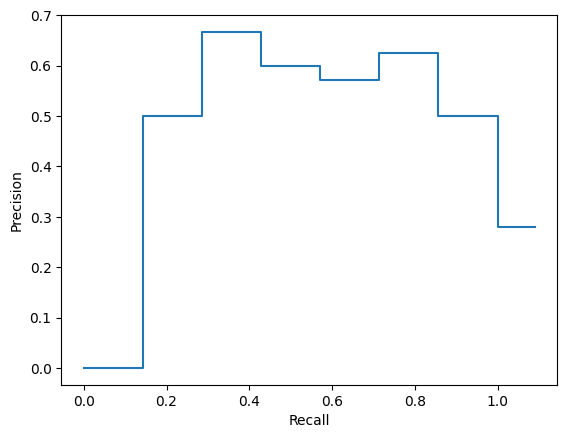

In [143]:
disp_basic.plot()

In [88]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
# import matplotlib.pyplot as plt

# plot_precision_recall_curve(ada_sm, X_test, y_test, ax = plt.gca(),name = "SMOTE")

# plot_precision_recall_curve(ada_rus, X_test, y_test, ax = plt.gca(),name = "RUS")

# plt.title('Precision-Recall curve')
disp_basic.recall

[0.0,
 0.1,
 0.14285714285714285,
 0.2,
 0.2857142857142857,
 0.30000000000000004,
 0.4,
 0.42857142857142855,
 0.5,
 0.5714285714285714,
 0.6,
 0.7000000000000001,
 0.7142857142857143,
 0.8,
 0.8571428571428571,
 0.9,
 1.0]

In [26]:
disp_basic.precision

[0.0,
 0.0,
 0.5,
 0.5,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.625,
 0.625,
 0.5,
 0.5,
 0.28]

In [97]:
[precision_recall_match_basic.get(r) for r in recall_values_basic]

[0.0,
 0.0,
 0.5,
 0.5,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.625,
 0.625,
 0.5,
 0.5,
 0.28]

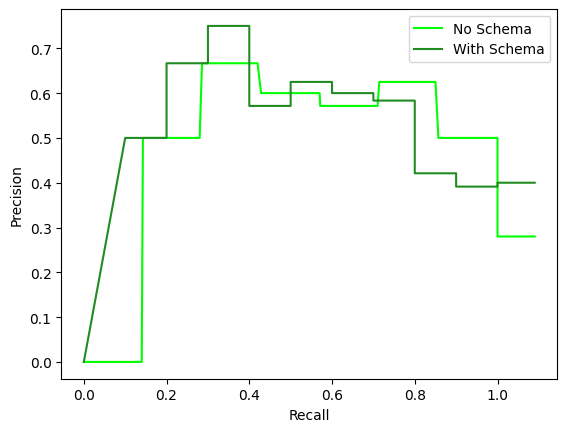

In [144]:
plt.plot( recall_values_basic, [precision_recall_match_basic.get(r) for r in recall_values_basic],label="No Schema", color='lime')
plt.plot( recall_values_advanced, [precision_recall_match_advanced.get(r) for r in recall_values_advanced],label="With Schema", color = 'forestgreen')

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()

plt.savefig('BoringplotTogether.png')


In [ ]:
auc_precision_recall_basic = auc(disp.recall_basic,disp.precision_basic)
auc_precision_recall_advanced = auc(disp.recall_advanced,disp.precision_advanced)